In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
 
data = pd.read_csv(r"..\zasoby\housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)
 
data = data.loc[:,['LSTAT','MEDV']]
data.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [3]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

LSTAT    10.005
MEDV      7.975
dtype: float64

In [4]:
cond = ((data < (Q1 - 1.5 * IQR)) & (data > (Q3 + 1.5 * IQR)))
data = data.loc[~cond.any(axis=1)]

In [5]:
X = data.LSTAT.to_numpy().reshape(-1, 1)
y = data.MEDV.to_numpy().reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
scaler2 = StandardScaler()
y_scaled = scaler2.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

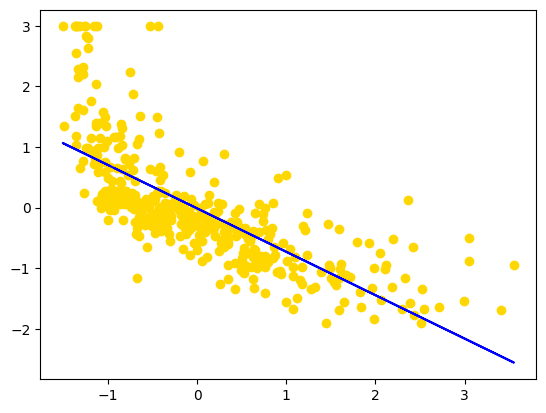

In [9]:
plt.scatter(x=X_train, y=y_train, c='gold')
plt.plot(X_train, y_pred_train, color='blue')
plt.show()

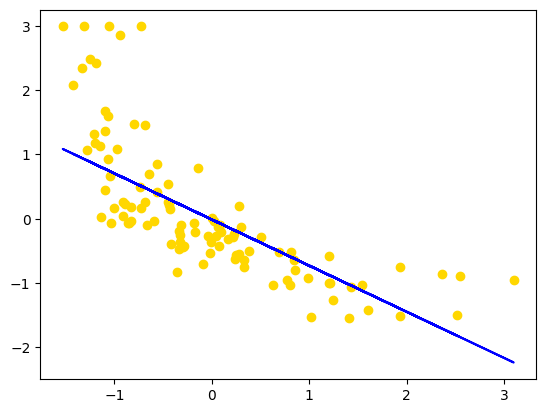

In [10]:
plt.scatter(x=X_test, y=y_test, c='gold')
plt.plot(X_test, y_pred_test, color='blue')
plt.show()

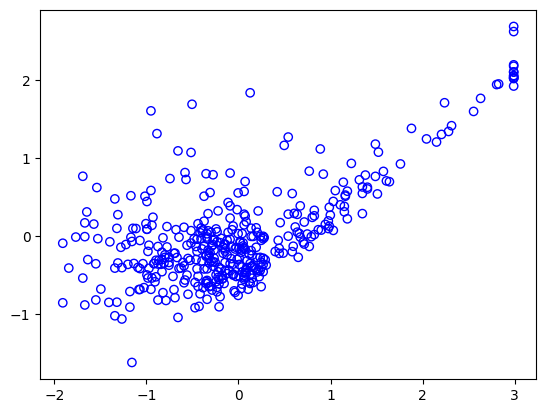

In [11]:
plt.scatter(x=y_train, y=y_train - y_pred_train, marker='o', facecolors='none', edgecolors='blue')

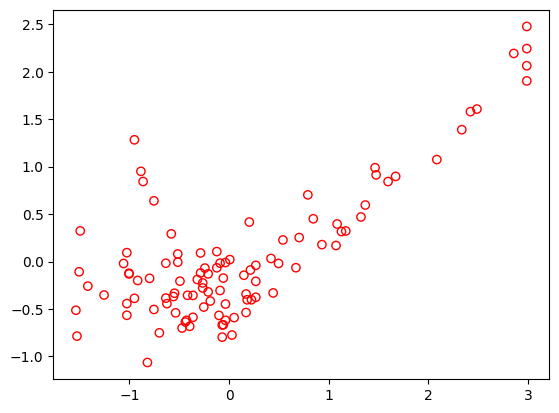

In [12]:
plt.scatter(x=y_test, y=y_test - y_pred_test, marker='o', facecolors='none', edgecolors='red')

In [13]:
data2 = pd.read_csv(r"..\zasoby\housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)
 
data2 = data.loc[:,['LSTAT','MEDV']]
data2.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [14]:
X2 = data2.LSTAT.to_numpy().reshape(-1,1)
y2 = data2.MEDV.to_numpy().reshape(-1,1)

In [15]:
scaler3 = StandardScaler()
X_sc = scaler3.fit_transform(X2)
scaler4 = StandardScaler()
y_sc = scaler4.fit_transform(y2)

In [16]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_sc, y_sc, test_size=0.2)

In [17]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
y2_pred_train = lr2.predict(X2_train)
y2_pred_test = lr2.predict(X2_test)

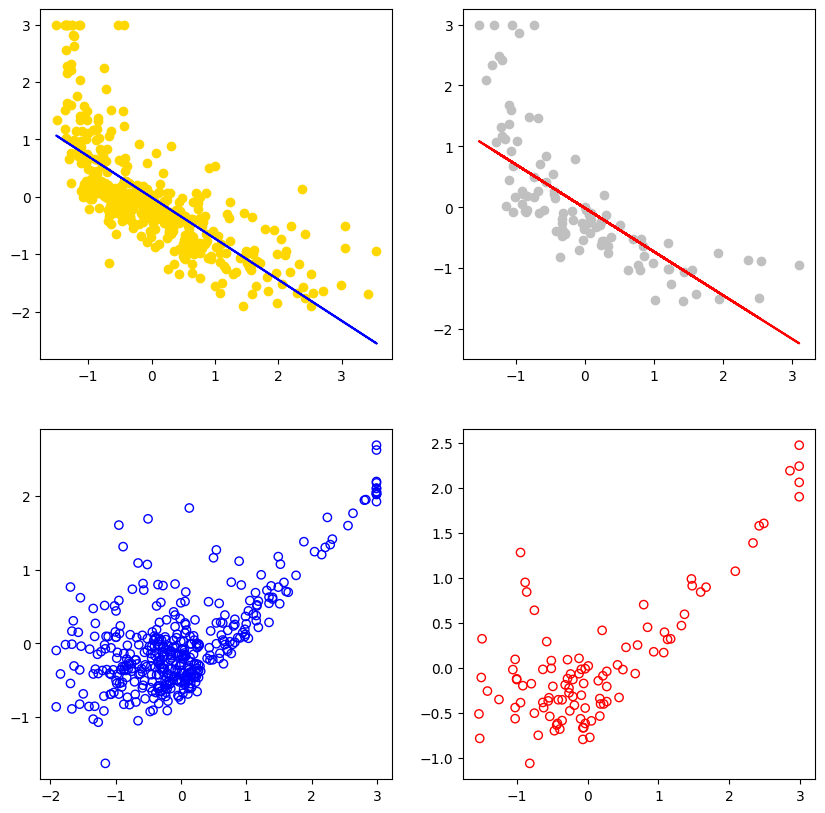

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0, 0].scatter(x=X_train, y=y_train, c='gold')
ax[0, 0].plot(X_train, y_pred_train, color='blue')
ax[0, 1].scatter(x=X_test, y=y_test, c='silver')
ax[0, 1].plot(X_test, y_pred_test, color='red')
ax[1, 0].scatter(x=y_train, y=y_train - y_pred_train, marker='o', facecolors='none', edgecolors='blue')
ax[1, 1].scatter(x=y_test, y=y_test - y_pred_test, marker='o', facecolors='none', edgecolors='red')
plt.show()

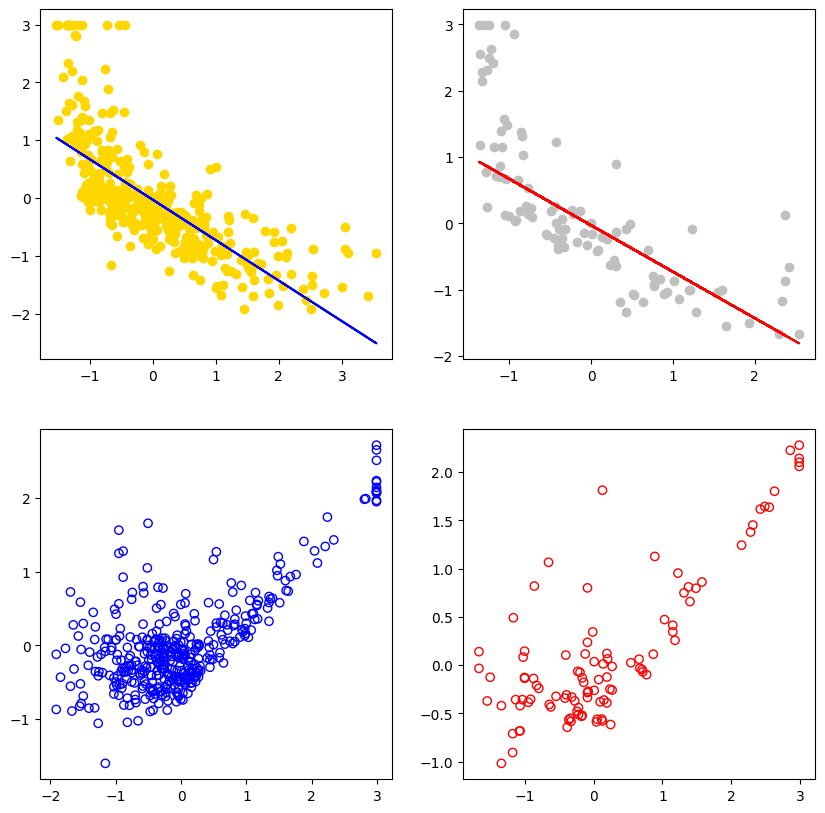

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0, 0].scatter(x=X2_train, y=y2_train, c='gold')
ax[0, 0].plot(X2_train, y2_pred_train, color='blue')
ax[0, 1].scatter(x=X2_test, y=y2_test, c='silver')
ax[0, 1].plot(X2_test, y2_pred_test, color='red')
ax[1, 0].scatter(x=y2_train, y=y2_train - y2_pred_train, marker='o', facecolors='none', edgecolors='blue')
ax[1, 1].scatter(x=y2_test, y=y2_test - y2_pred_test, marker='o', facecolors='none', edgecolors='red')
plt.show()

In [20]:
lr.score(X_test, y_test)

0.5492711775890399

In [21]:
lr2.score(X2_test, y2_test)

0.5471272958500879